### TP 1. Part 1.

We are given a ready implementation of bandit, regret, visualization.
We collect data over independent runs instead of a single one. We visualize the histograms as well as Regrets.

We choose to use 3 armed bandits with time horizon equal to 5000.

In [1]:
import matplotlib.pyplot as plt

In [2]:
import Environments_StochasticBandits as env
import Algorithms_Baselines as alg
import Algorithms_MyStrategy as myalg
import Experiments_MakeBanditExperiments as xps
import time


nbArms=3
timeHorizon=5000
outputs = []
names = []


In [3]:
def run_bandits(env_bandits, nbArms, timeHorizon, means, 
                learner_type, nb_exp, show, distribution='bern', 
                skipplots=False,
                show_low_bound=True, 
                show_upper_bound=False):
    assert len(means) == nbArms
    # 1. Create a bandit environment
    bandit = env_bandits(nbArms)
    if distribution == 'bern':
        bandit.createBernoulliArmsFromMeans(means)
    if distribution == 'gauss':
        bandit.createGaussianArms(0.1,0.5)  
    if distribution == 'expon':
        bandit.createExponArms(0.1)   
    if distribution == 'poisson':
        bandit.createPoissonArms(0.1)   



    # bandit.createBernoulliArms(0.1) # Using a minimal gap of 0.1

    #2. Create a bandit algorithm
    learner = learner_type(nbArms, distribution=distribution)

    #3. Run an experiment and collects data
    output = xps.ManyBanditOneLearnerOneRun(bandit, learner, timeHorizon, nb_exp)
    arms1,rewards1,regrets1,cumulativeregrets1 = output
    # 4. Generate a name and plot the data
    name1 = str(int(time.time())) + bandit.name() + "-" + learner.name()
    #xps.plot_LowerBound(bandit, timeHorizon, show=show)
    #plt.show()
    if not skipplots:
        xps.plotManyBanditOneLearnerOneRun(bandit, learner.name(), arms1,rewards1,regrets1,cumulativeregrets1, 
                                           show=show,             
                                           show_low_bound=show_low_bound, 
                                            show_upper_bound=show_upper_bound)

    return bandit, learner, output, learner.name()

Greedy strategy results. We have linear regret.

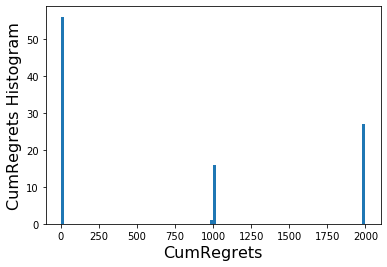

[0.33479529 0.08109302 1.        ]


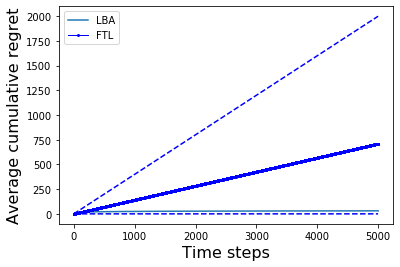

In [7]:
bandit, learner, output, name = run_bandits(env_bandits=env.StochasticBandit, 
            nbArms=nbArms,
            timeHorizon=timeHorizon,
            means=[0.2,0.4,0.6], 
            learner_type=alg.FTL, 
            nb_exp=100,
            show=True)
outputs.append(output)
names.append(name)

Here we present a histogram and a plot of cumulative regret with quantiles for FTL.

The same for UCB with tie breaking:

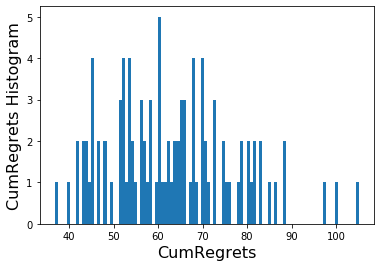

[0.33479529 0.08109302 1.        ]


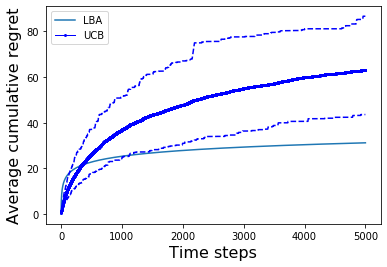

In [5]:
bandit, learner, output, name = run_bandits(env_bandits=env.StochasticBandit, 
            nbArms=nbArms,
            timeHorizon=timeHorizon,
            means=[0.2,0.4,0.6], 
            learner_type=alg.UCB, 
            nb_exp=100,
            show=True)
outputs.append(output)
names.append(name)

Each of them ran 100 times for timeHorizon equal to 5000.
We see that regret increses a lot for FTL while UCB stays closer to LowerBound.

FTL is not a safe technique comparing to UCB as it has linear regret when UCB has logarithmic. 


[0.33479529 0.08109302 1.        ]


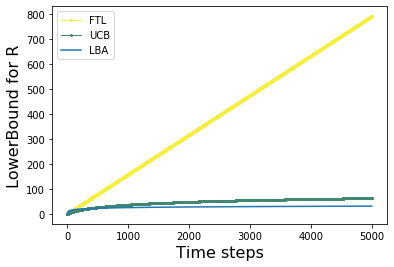

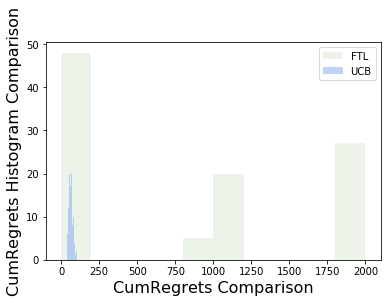

In [6]:
xps.plotToCompare2(bandit, outputs, algos=['FTL', 'UCB'])

### Part 2

Now we implemented KLUCB algorithm and TS sampling.

In [7]:
#nbArms=3
#timeHorizon=5000

KLUCB algorithm:

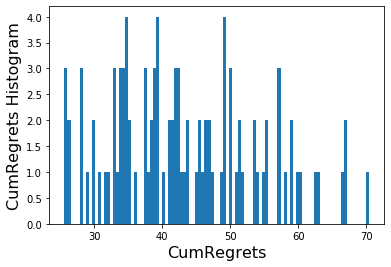

[0.33479529 0.08109302 1.        ]


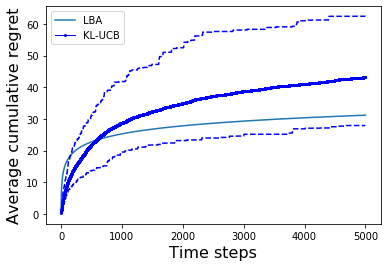

In [8]:
bandit, learner, output, name = run_bandits(env_bandits=env.StochasticBandit, 
            nbArms=nbArms,
            timeHorizon=timeHorizon,
            means=[0.2,0.4,0.6], 
            learner_type=alg.KLUCBgeneral, 
            nb_exp=100,
            show=True)
outputs.append(output)
names.append(name)

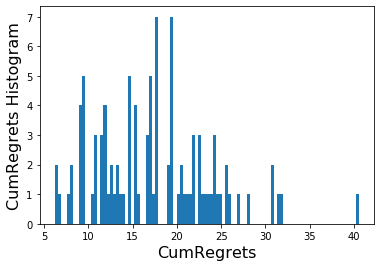

[0.33479529 0.08109302 1.        ]


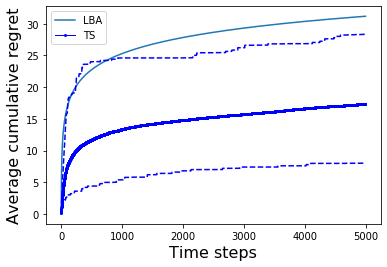

In [9]:
bandit, learner, output, name = run_bandits(env_bandits=env.StochasticBandit, 
            nbArms=nbArms,
            timeHorizon=timeHorizon,
            means=[0.2,0.4,0.6], 
            learner_type=alg.TS, 
            nb_exp=100,
            show=True)
outputs.append(output)
names.append(name)

[0.33479529 0.08109302 1.        ]


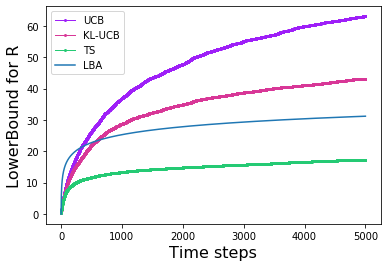

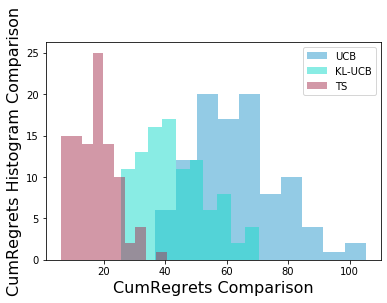

In [10]:
xps.plotToCompare2(bandit, outputs[1:], algos=names[1:])

Both strategies give logarithmic regret.

Let us repeat the same on Gaussian Bandits.

In [11]:
outputs_gauss = []
names_gauss = []

TS for gaussian

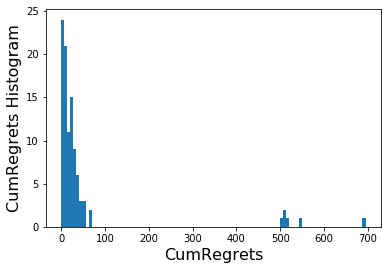

[0.07463938 0.03534004 1.        ]


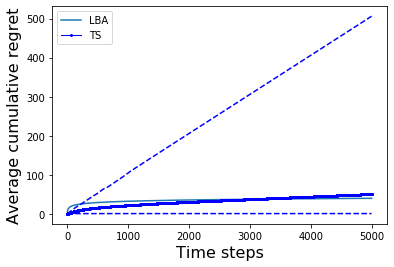

In [12]:
bandit, learner, output, name = run_bandits(env_bandits=env.StochasticBandit, 
            nbArms=nbArms,
            timeHorizon=timeHorizon,
            means=[0.2,0.4,0.6], 
            learner_type=alg.TS, 
            nb_exp=100,
            show=True,
            distribution='gauss')
outputs_gauss.append(output)
names_gauss.append(name)

KLUCB for gaussian

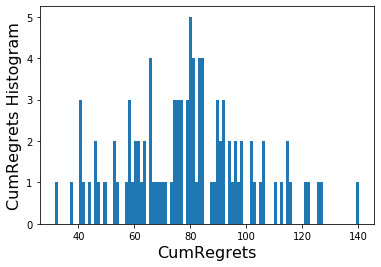

[0.04206097 0.04174977 1.        ]


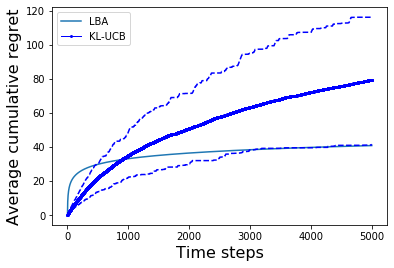

In [13]:
bandit, learner, output, name = run_bandits(env_bandits=env.StochasticBandit, 
            nbArms=nbArms,
            timeHorizon=timeHorizon,
            means=[0.2,0.4,0.6], 
            learner_type=alg.KLUCBgeneral, 
            nb_exp=100,
            show=True,
            distribution='gauss')
outputs_gauss.append(output)
names_gauss.append(name)

UCB for gaussian with deviation = 0.5

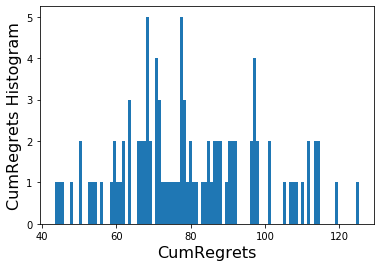

[0.02028253 1.         0.21360763]


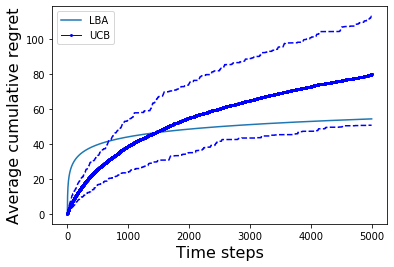

In [14]:
bandit, learner, output, name = run_bandits(env_bandits=env.StochasticBandit, 
            nbArms=nbArms,
            timeHorizon=timeHorizon,
            means=[0.2,0.4,0.6], 
            learner_type=alg.UCB, 
            nb_exp=100,
            show=True,
            distribution='gauss')
outputs_gauss.append(output)
names_gauss.append(name)

[0.02028253 1.         0.21360763]


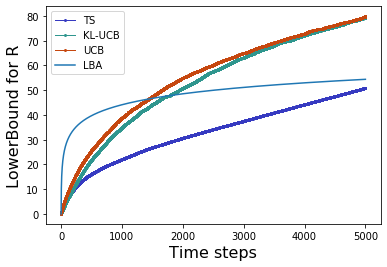

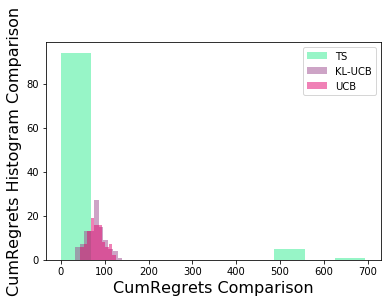

In [15]:
xps.plotToCompare2(bandit, outputs_gauss, algos=names_gauss)

We can see that asymptotically the results of used strategies for gaussian distribution are not as good as for bernouilli.

### Part 3

We implemented UCB-Laplace and UCB-peeling

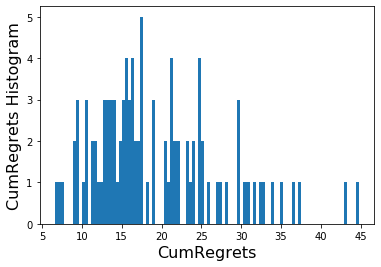

[0.33479529 0.08109302 1.        ]


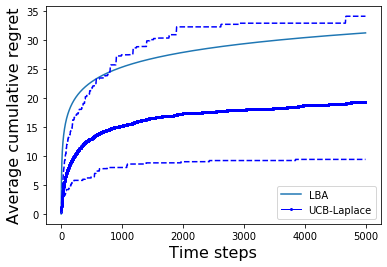

In [16]:
bandit, learner, output, name = run_bandits(env_bandits=env.StochasticBandit, 
            nbArms=nbArms,
            timeHorizon=timeHorizon,
            means=[0.2,0.4,0.6], 
            learner_type=alg.UCBlaplace, 
            nb_exp=100,
            show=True)
outputs.append(output)
names.append(name)

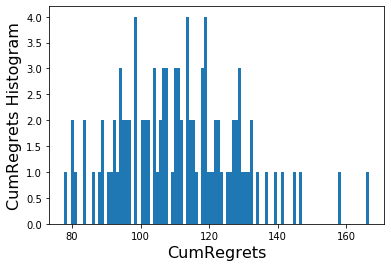

[0.33479529 0.08109302 1.        ]


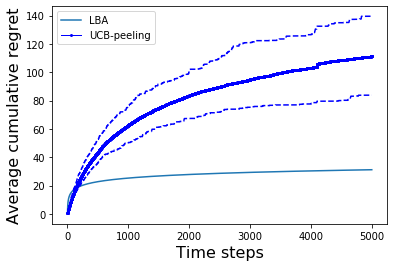

In [17]:
bandit, learner, output, name = run_bandits(env_bandits=env.StochasticBandit, 
            nbArms=nbArms,
            timeHorizon=timeHorizon,
            means=[0.2,0.4,0.6], 
            learner_type=alg.UCBpeeling, 
            nb_exp=100,
            show=True)
outputs.append(output)
names.append(name)

[0.33479529 0.08109302 1.        ]


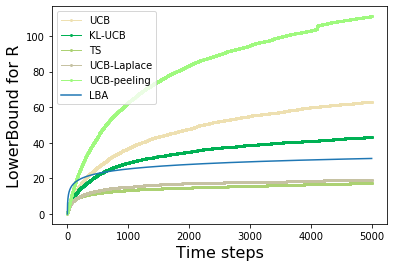

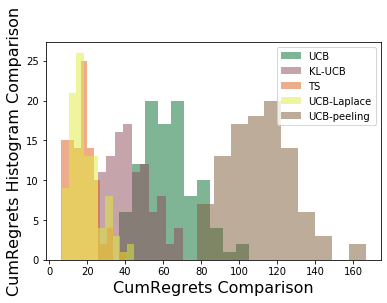

In [18]:
xps.plotToCompare2(bandit, outputs[1:], algos=names[1:])

Now we apply those two new UCB to gaussians:

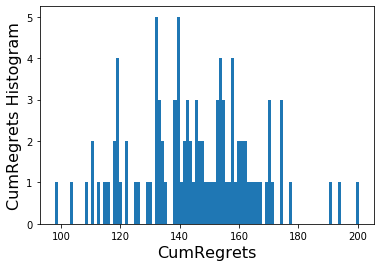

[0.04300036 0.02006397 1.        ]


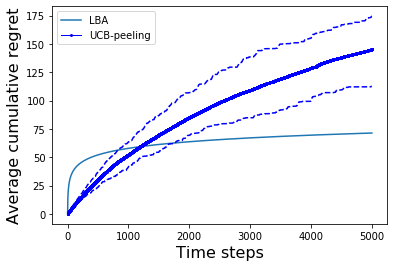

In [19]:
bandit, learner, output, name = run_bandits(env_bandits=env.StochasticBandit, 
            nbArms=nbArms,
            timeHorizon=timeHorizon,
            means=[0.2,0.4,0.6], 
            learner_type=alg.UCBpeeling, 
            nb_exp=100,
            show=True,
            distribution='gauss')
outputs_gauss.append(output)
names_gauss.append(name)

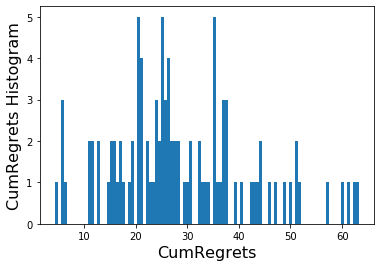

[1.         0.29940347 0.02530608]


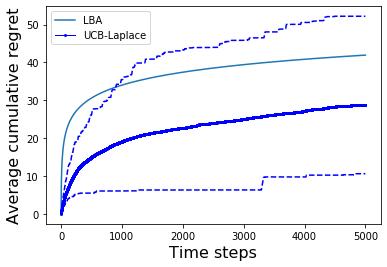

In [20]:
bandit, learner, output, name = run_bandits(env_bandits=env.StochasticBandit, 
            nbArms=nbArms,
            timeHorizon=timeHorizon,
            means=[0.2,0.4,0.6], 
            learner_type=alg.UCBlaplace, 
            nb_exp=100,
            show=True,
            distribution='gauss')
outputs_gauss.append(output)
names_gauss.append(name)

Poisson:

In [6]:
outputs_poisson = []
names_poisson = []

[0.57233095 0.0203238  1.        ]


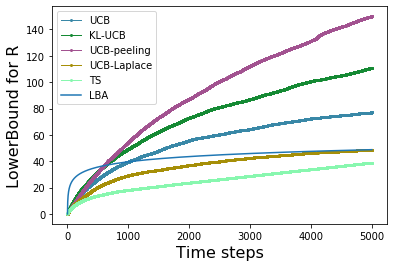

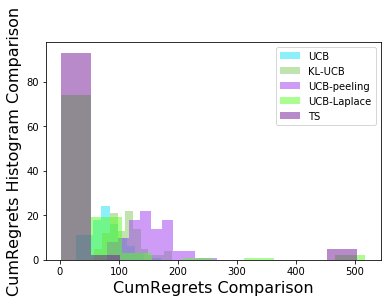

In [7]:
alg_titles = [alg.UCB, alg.KLUCBgeneral, alg.UCBpeeling, alg.UCBlaplace, alg.TS]
for alg_title in alg_titles:
    bandit, learner, output, name = run_bandits(env_bandits=env.StochasticBandit, 
                nbArms=nbArms,
                timeHorizon=timeHorizon,
                means=[0.2,0.4,0.6], 
                learner_type=alg_title, 
                nb_exp=100,
                show=True,
                skipplots=True,
                distribution="poisson")
    outputs_poisson.append(output)
    names_poisson.append(name)
xps.plotToCompare2(bandit, outputs_poisson, algos=names_poisson)

UCB-Laplace and TS appear to be the best.

In [23]:
#xps.plotToCompare2(bandit, outputs_poisson, algos=names_poisson)

### BESA

The best-empirical subsampled arm.

We implemented two types of BESA. One which stores the rewards of all previous steps and another one, cheating, that stores a fixed length of previous steps. In out case the limit as 100.

The last one fails as it can be seen in the second picture.

In [4]:
besa_means = [0.2,0.4]
alg_titles = [alg.UCB, alg.KLUCBgeneral, alg.UCBlaplace, alg.UCBpeeling, alg.BESA, alg.TS]

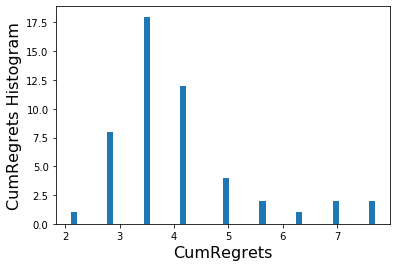

[1.36273775 1.        ]


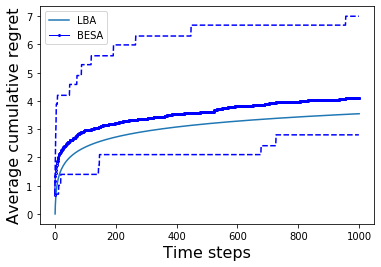

In [6]:
bandit, learner, output, name = run_bandits(env_bandits=env.StochasticBandit, 
                nbArms=2,
                timeHorizon=1000,
                means=[0.2,0.9], 
                learner_type=alg.BESA, 
                nb_exp=50,
                show=True,
                skipplots=False)

/home/mariia/.local/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3257: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/home/mariia/.local/lib/python3.7/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


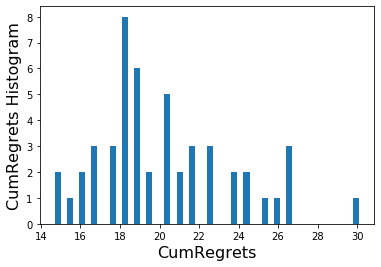

[1.36273775 1.        ]


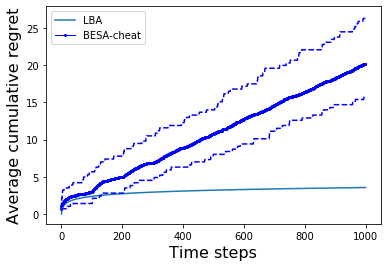

In [5]:
bandit, learner, output, name = run_bandits(env_bandits=env.StochasticBandit, 
                nbArms=2,
                timeHorizon=1000,
                means=[0.2,0.9], 
                learner_type=alg.BESAcheat, 
                nb_exp=50,
                show=True,
                skipplots=False)

### BERN

In [10]:
alg_titles = [alg.UCB, alg.KLUCBgeneral, alg.UCBlaplace, alg.UCBpeeling, alg.BESA, alg.TS]
timeHorizon = 1000
nb_exp=50

[0.09151622 1.        ]


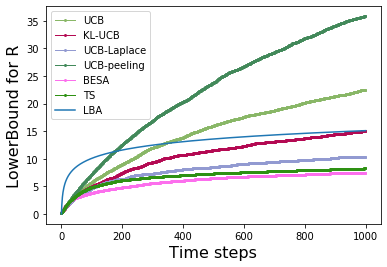

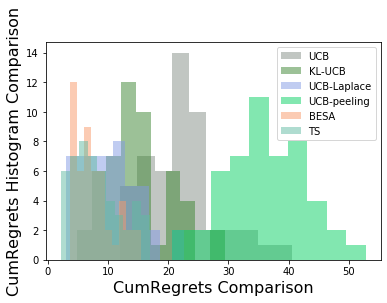

In [11]:
cur_outputs = []
cur_names=[]
for alg_title in alg_titles:
    bandit, learner, output, name = run_bandits(env_bandits=env.StochasticBandit, 
                nbArms=2,
                timeHorizon=timeHorizon,
                means=besa_means, 
                learner_type=alg_title, 
                nb_exp=nb_exp,
                show=True,
                skipplots=True)
    cur_outputs.append(output)
    cur_names.append(name)
xps.plotToCompare2(bandit, cur_outputs, algos=cur_names)

### POISSON

[0.02031505 1.        ]


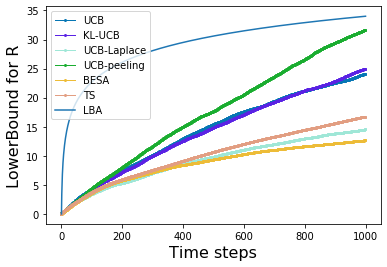

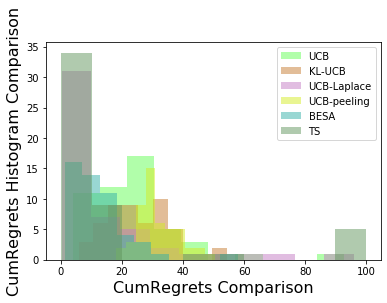

In [12]:
cur_outputs = []
cur_names=[]
for alg_title in alg_titles:
    bandit, learner, output, name = run_bandits(env_bandits=env.StochasticBandit, 
                nbArms=2,
                timeHorizon=timeHorizon,
                means=besa_means, 
                learner_type=alg_title, 
                nb_exp=nb_exp,
                show=True,
                skipplots=True,
                distribution="poisson")
    cur_outputs.append(output)
    cur_names.append(name)
xps.plotToCompare2(bandit, cur_outputs, algos=cur_names)

### GAUSSIAN

[0.02258009 1.        ]


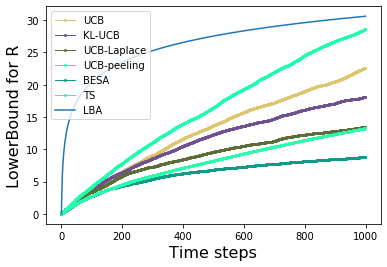

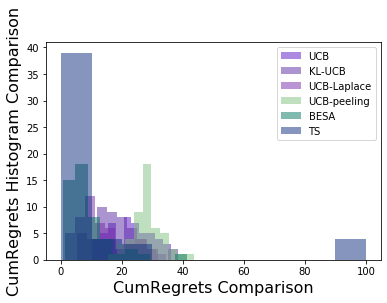

In [13]:
cur_outputs = []
cur_names=[]
for alg_title in alg_titles:
    bandit, learner, output, name = run_bandits(env_bandits=env.StochasticBandit, 
                nbArms=2,
                timeHorizon=timeHorizon,
                means=besa_means, 
                learner_type=alg_title, 
                nb_exp=nb_exp,
                show=True,
                skipplots=True,
                distribution="gauss")
    cur_outputs.append(output)
    cur_names.append(name)
xps.plotToCompare2(bandit, cur_outputs, algos=cur_names)

### Exp

[0.03142413 1.        ]


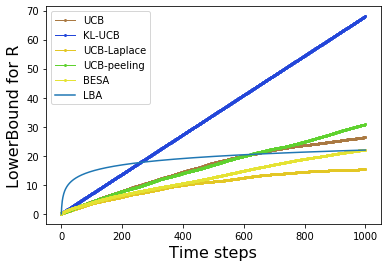

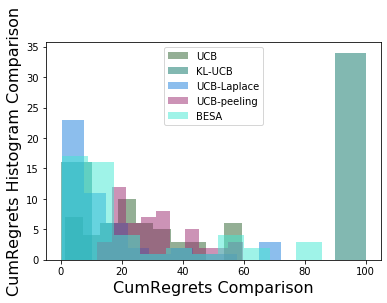

In [17]:
alg_titles = [alg.UCB, alg.KLUCBgeneral, alg.UCBlaplace, alg.UCBpeeling, alg.BESA]
besa_means = [0.2,0.4]
cur_outputs = []
cur_names=[]
for alg_title in alg_titles:
    bandit, learner, output, name = run_bandits(env_bandits=env.StochasticBandit, 
                nbArms=2,
                timeHorizon=timeHorizon,
                means=besa_means, 
                learner_type=alg_title, 
                nb_exp=nb_exp,
                show=True,
                skipplots=True,
                distribution="expon")
    cur_outputs.append(output)
    cur_names.append(name)
xps.plotToCompare2(bandit, cur_outputs, algos=cur_names)

The best strategy with our implementation depends on the distribution.

For exponential one the best strategy seems to be UCB-Laplace.

For gaussian, poisson and bernouilli the best strategy turned out to be BESA.

### PART 4


Now we simulate a bandit environment with Bernoulli arms all with mean 0.5 and one with 0.5 + eps

In [5]:
eps = 0.0001
new_means = [0.5,0.5, 0.5+eps]

Regret Low Bound is estimated through the expression from part 1. The numerator in the expression has an order of eps, while the denominator of eps square. That leads to divergence of our estimation formula.

The worst regret is linear.

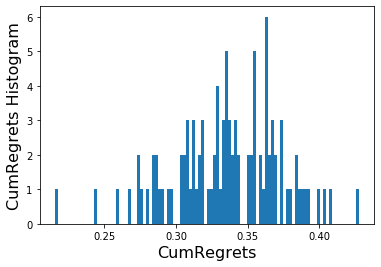

[2.00000004e-08 2.00000004e-08 1.00000000e+00]


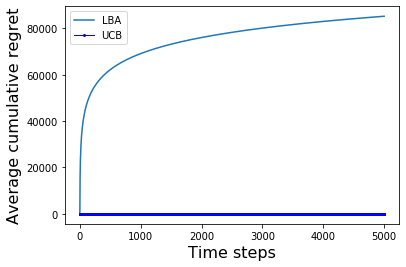

In [5]:
bandit, learner, output, name = run_bandits(env_bandits=env.StochasticBandit, 
            nbArms=len(new_means),
            timeHorizon=timeHorizon,
            means=new_means, 
            learner_type=alg.UCB, 
            nb_exp=100,
            show=True,
            show_low_bound=True, 
            show_upper_bound=True)

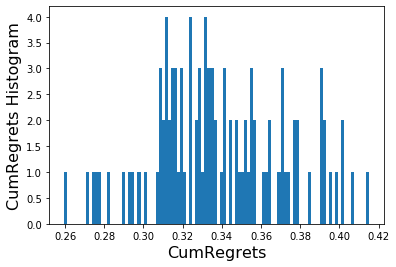

[2.00000004e-08 2.00000004e-08 1.00000000e+00]


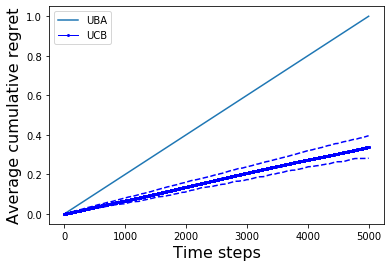

In [6]:
bandit, learner, output, name = run_bandits(env_bandits=env.StochasticBandit, 
            nbArms=len(new_means),
            timeHorizon=timeHorizon,
            means=new_means, 
            learner_type=alg.UCB, 
            nb_exp=100,
            show=True,
            show_low_bound=False, 
            show_upper_bound=True)

scale is relative